## Analyse et Prédiction du Risque de Diabète


 Ce projet vise à segmenter les données de patients à risque de diabète en utilisant des modèles de clustering (comme K-Means). Une classification supervisée est ensuite appliquée pour prédire le risque de diabète avec précision, en évaluant plusieurs algorithmes (Random Forest, SVM, etc.) et en optimisant leurs performances.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df =  pd.read_csv("dataset-diabete.csv",index_col=0)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Analyser la structure

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [5]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [7]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


Analyser la distribution des variables numériques.

In [8]:
df_numeriques =  df.select_dtypes(include =['int','float'])
df_categoriques = df.select_dtypes(include=["object"])

In [9]:
df_numeriques.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Créer la matrice de corrélation

In [10]:
correlation_matrix = df_numeriques.corr()

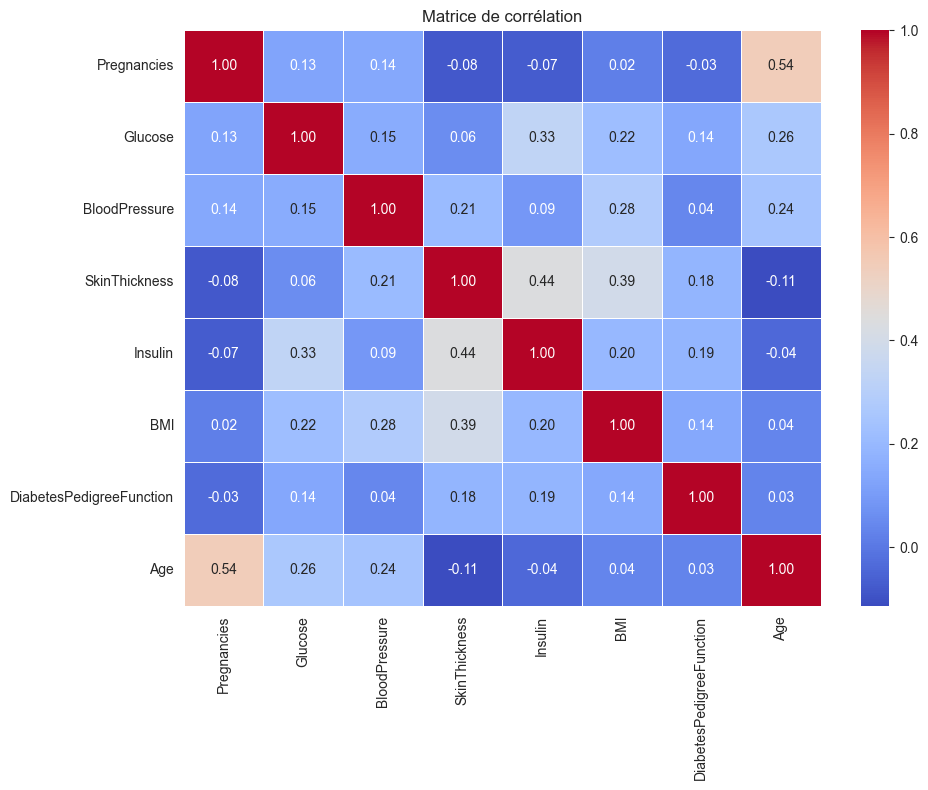

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

 ### Prétraitement des données - Gestion des valeurs manquantes et aberrantes

Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

In [12]:
import numpy as np

cols_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_replace_zero] = df[cols_replace_zero].replace(0, np.nan)

In [13]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

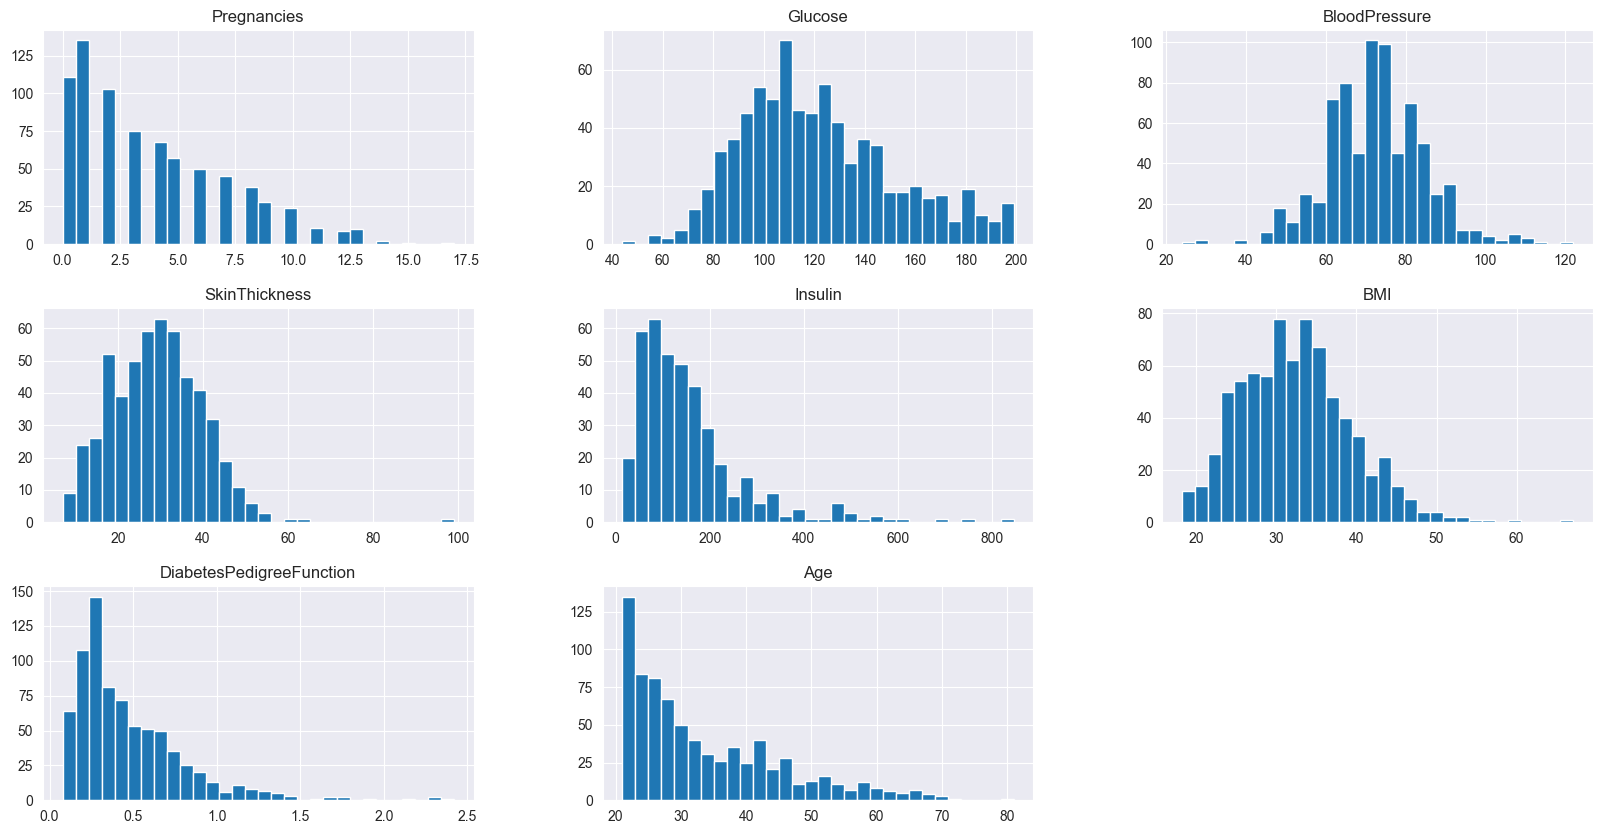

In [15]:
df.hist(bins=30 ,figsize=(20,10))
plt.show()



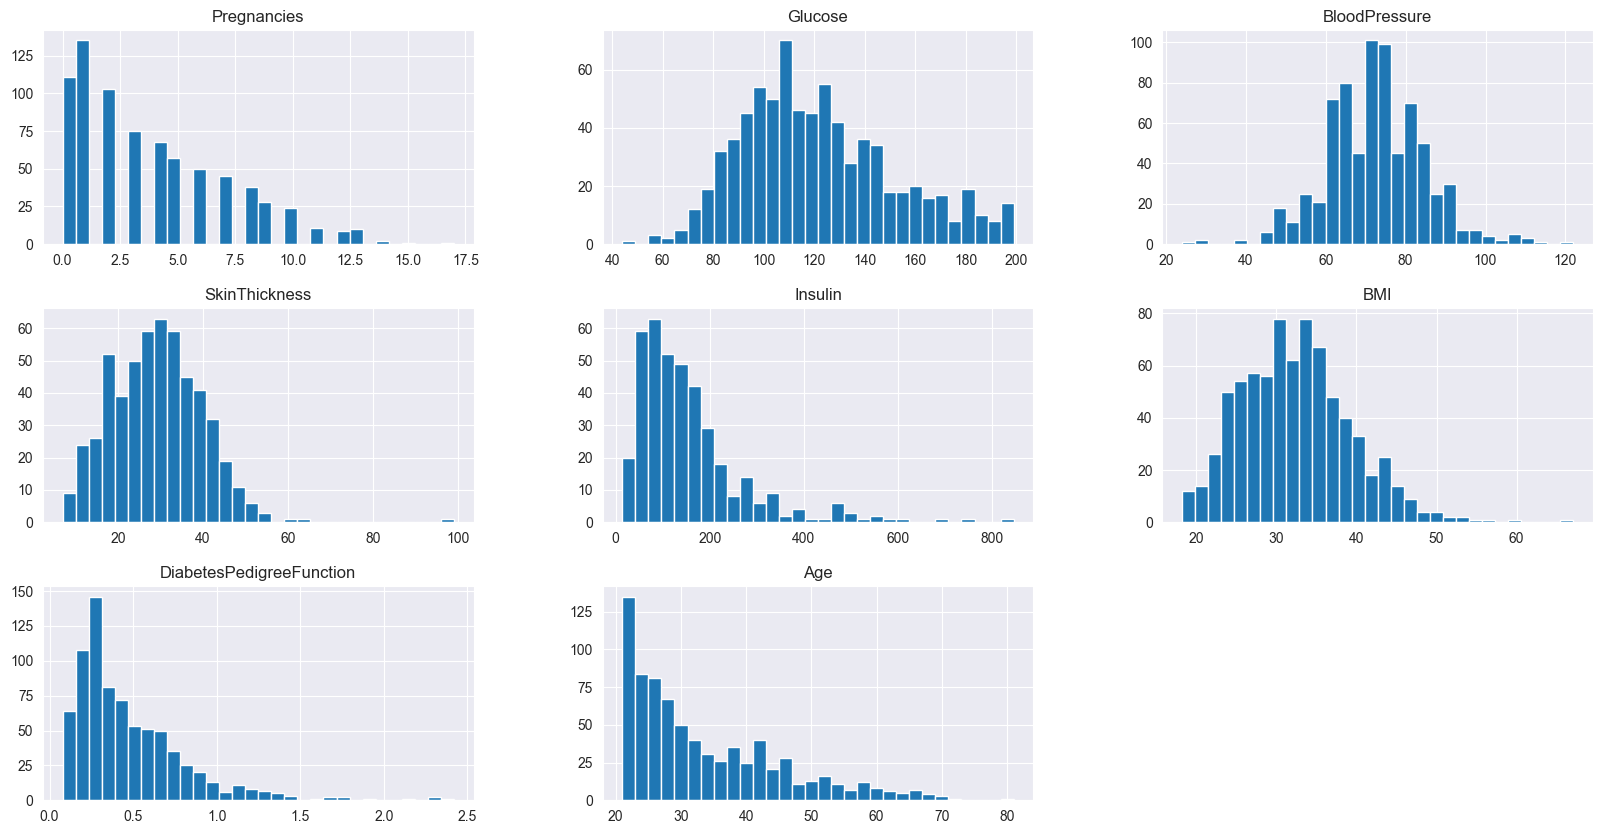

In [16]:
df.hist(bins=30 ,figsize=(20,10))
plt.show()

## KNN

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import zscore

print("Original data shape:", df_numeriques.shape)
print("Missing values before KNN imputation:")
print(df_numeriques.isnull().sum())

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

df_imputed = pd.DataFrame(
    knn_imputer.fit_transform(df_numeriques),
    columns=df_numeriques.columns,
    index=df_numeriques.index
)

print("\nAfter KNN imputation:")
print("Missing values:", df_imputed.isnull().sum().sum())
print(df_imputed)

Original data shape: (768, 8)
Missing values before KNN imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

After KNN imputation:
Missing values: 0
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0      

 ## Détecter outliers avec boîte à moustaches

Appliquer méthode IQR pour détecter outliers

Appliquer méthode Z-score


--- Pregnancies ---
Upper limit: 8.90
Lower limit: -1.21
Number of outliers: 86
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


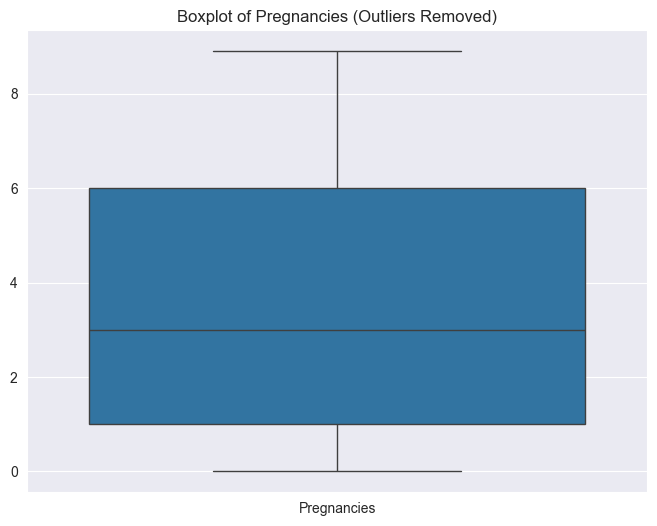


--- Glucose ---
Upper limit: 168.85
Lower limit: 72.94
Number of outliers: 93
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


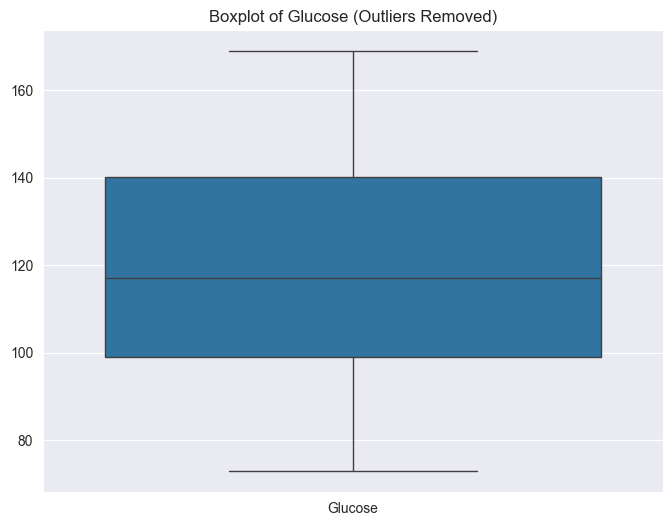


--- BloodPressure ---
Upper limit: 98.14
Lower limit: 40.07
Number of outliers: 56
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


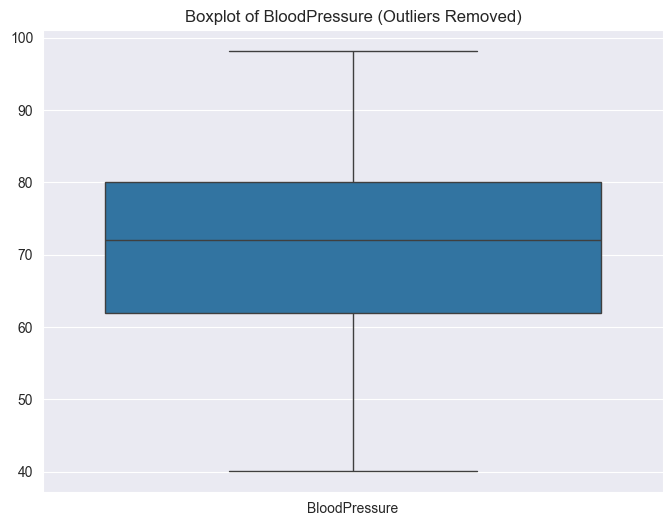


--- SkinThickness ---
Upper limit: 44.46
Lower limit: -3.39
Number of outliers: 37
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


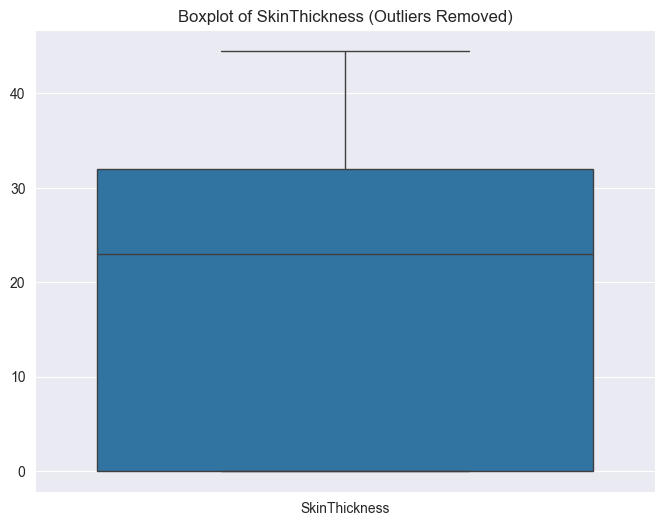


--- Insulin ---
Upper limit: 252.67
Lower limit: -93.07
Number of outliers: 56
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


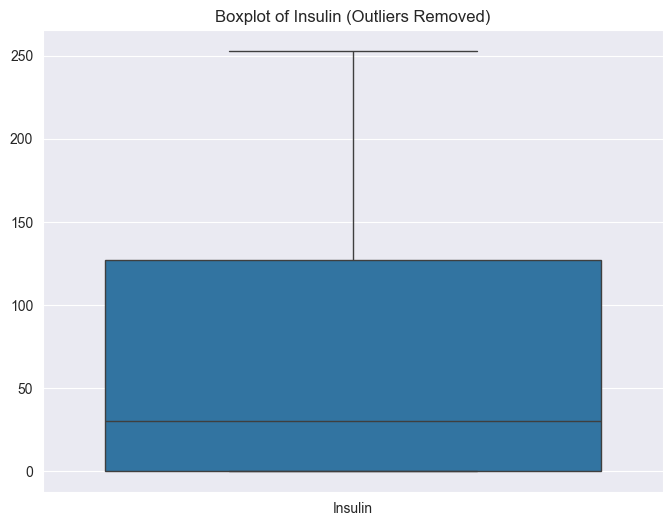


--- BMI ---
Upper limit: 43.82
Lower limit: 20.17
Number of outliers: 70
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


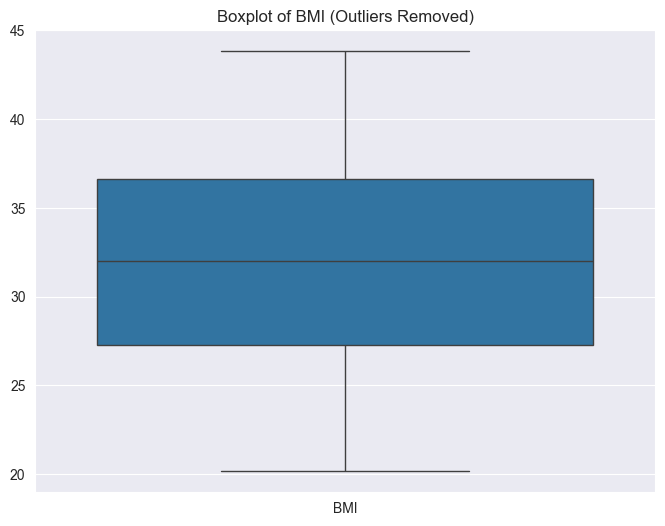


--- DiabetesPedigreeFunction ---
Upper limit: 0.97
Lower limit: -0.03
Number of outliers: 53
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


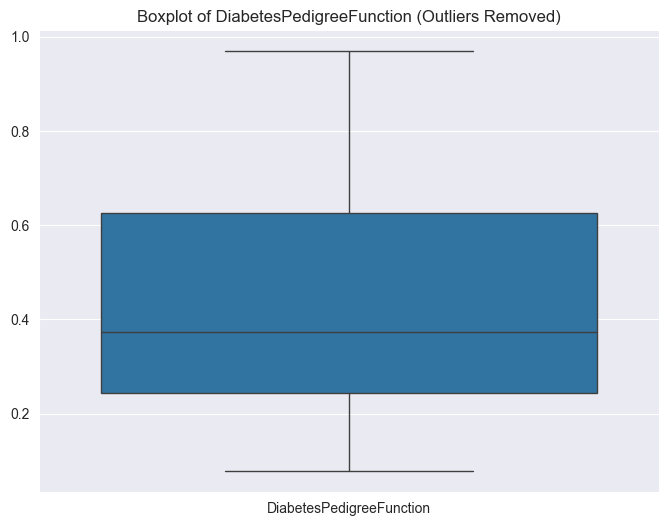


--- Age ---
Upper limit: 50.88
Lower limit: 15.60
Number of outliers: 81
Before removing outliers: 768
After removing outliers: 768
Total outliers removed: 0


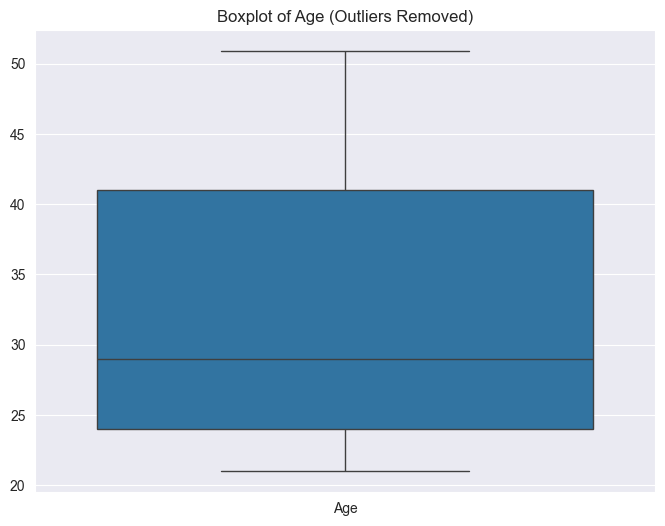

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df_imputed.copy()

for col in df_imputed.columns:
    upper_limit = df_imputed[col].mean() + 1.5 * df_imputed[col].std()
    lower_limit = df_imputed[col].mean() - 1.5 * df_imputed[col].std()
    print(f'\n--- {col} ---')
    print(f'Upper limit: {upper_limit:.2f}')
    print(f'Lower limit: {lower_limit:.2f}')
    outliers = df_imputed.loc[(df_imputed[col] > upper_limit) | (df_imputed[col] < lower_limit)]
    print(f'Number of outliers: {len(outliers)}')
    df_cleaned[col] = np.clip(df_cleaned[col], lower_limit, upper_limit)
    # df_cleaned = df_cleaned.loc[(df_cleaned[col] <= upper_limit) & (df_cleaned[col] >= lower_limit)]
    print(f'Before removing outliers: {len(df_imputed)}')
    print(f'After removing outliers: {len(df_cleaned)}')
    print(f'Total outliers removed: {len(df_imputed) - len(df_cleaned)}')
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cleaned[[col]])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()


Étudier les relations entre variables

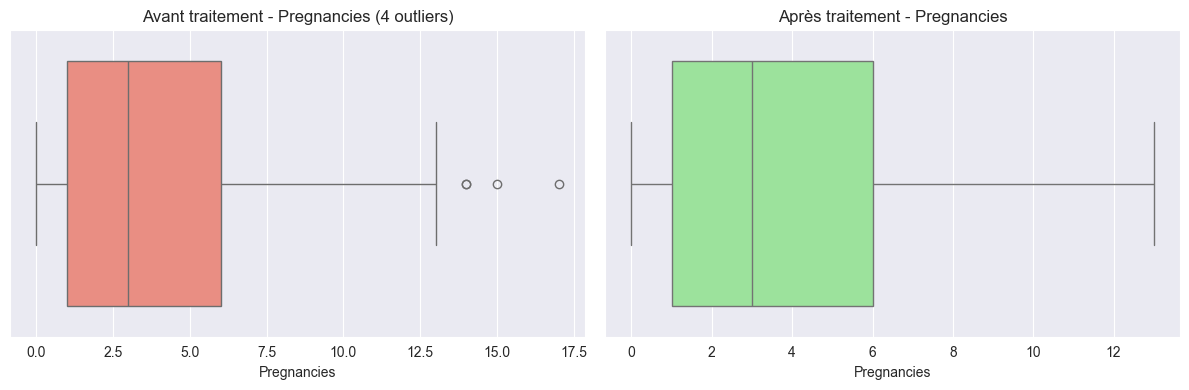

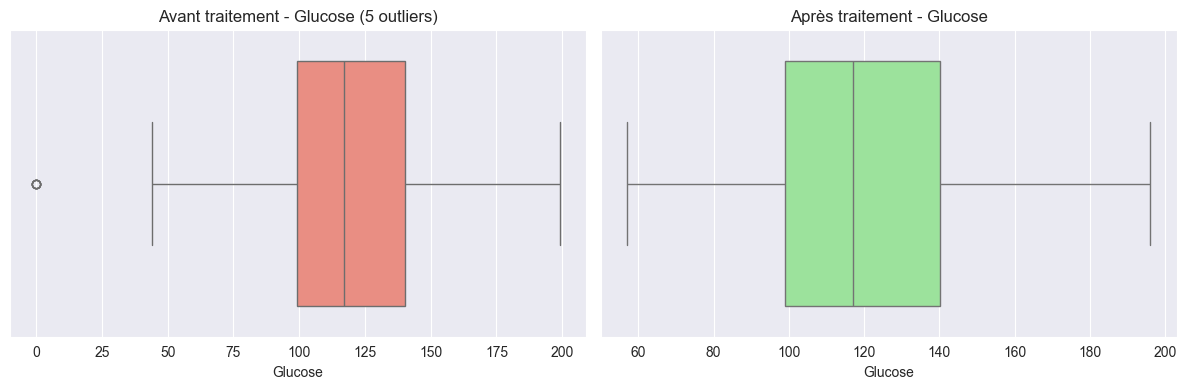

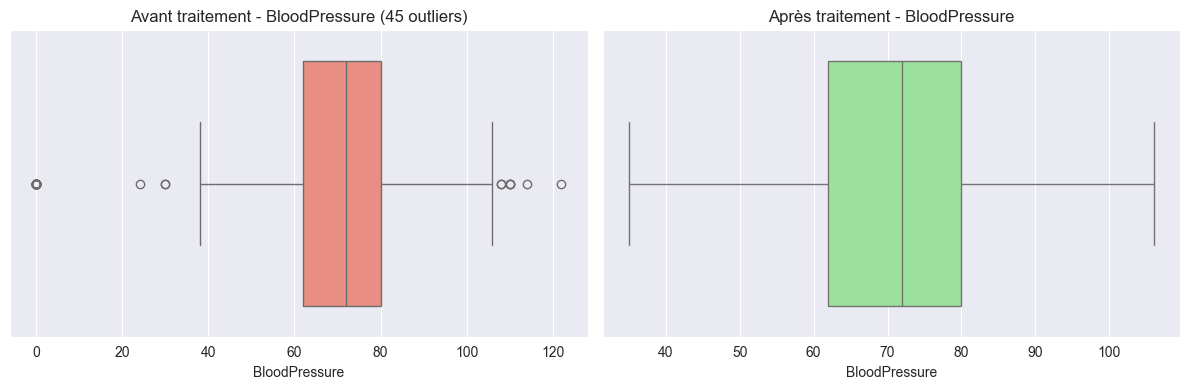

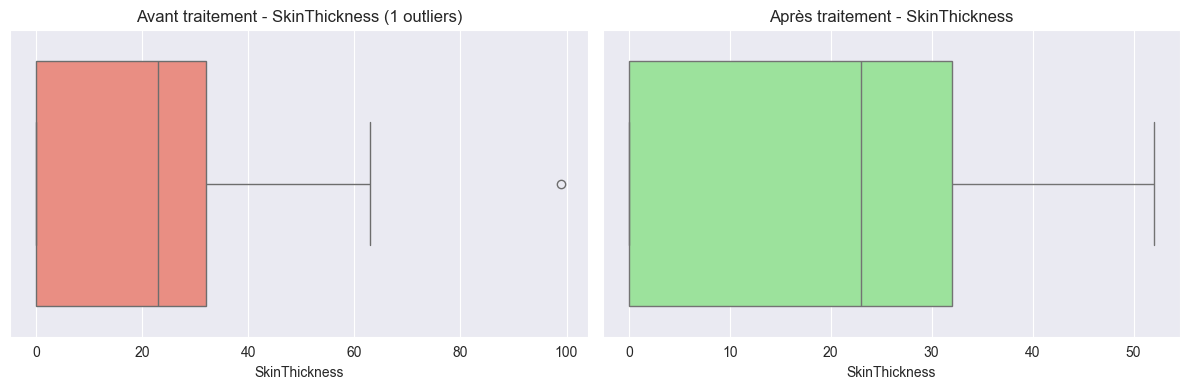

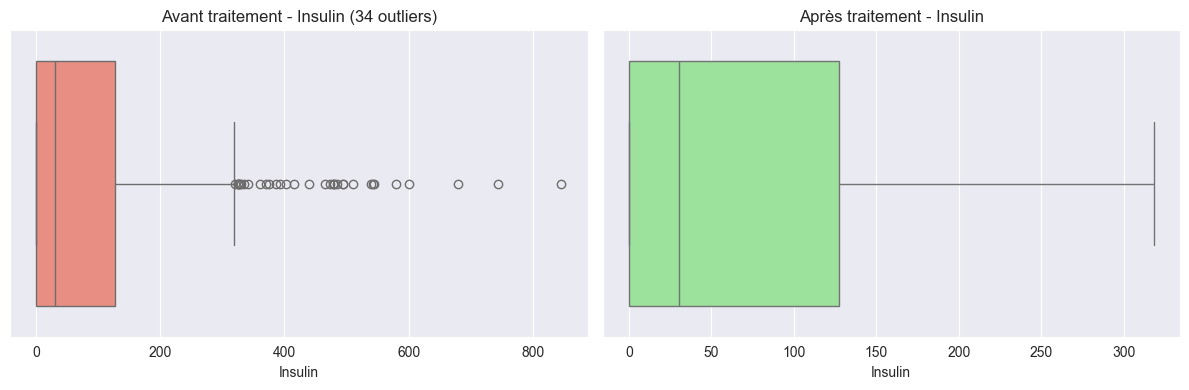

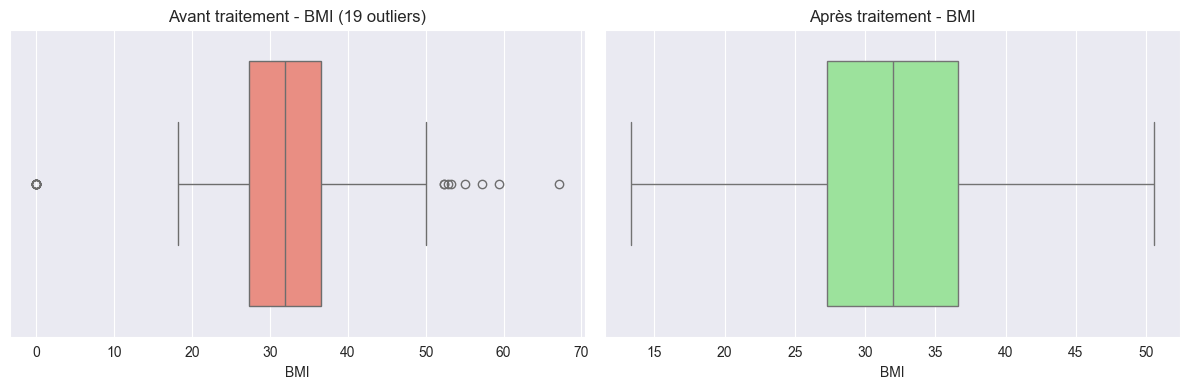

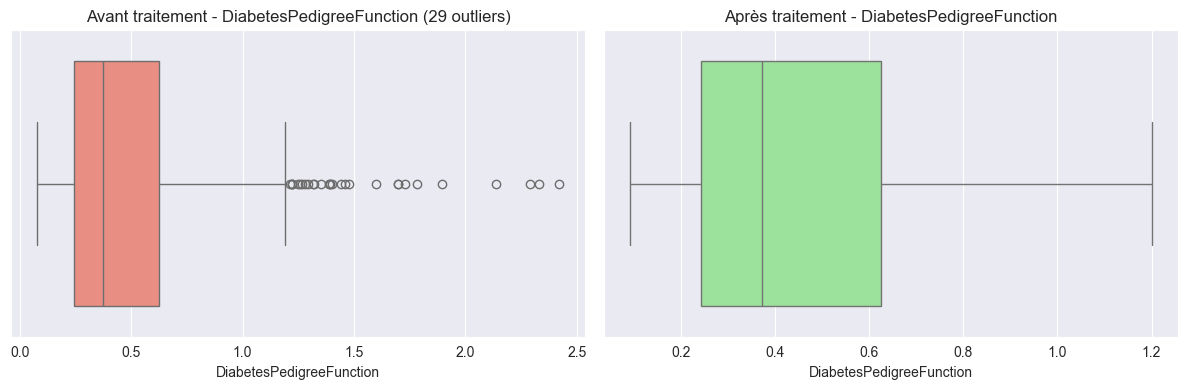

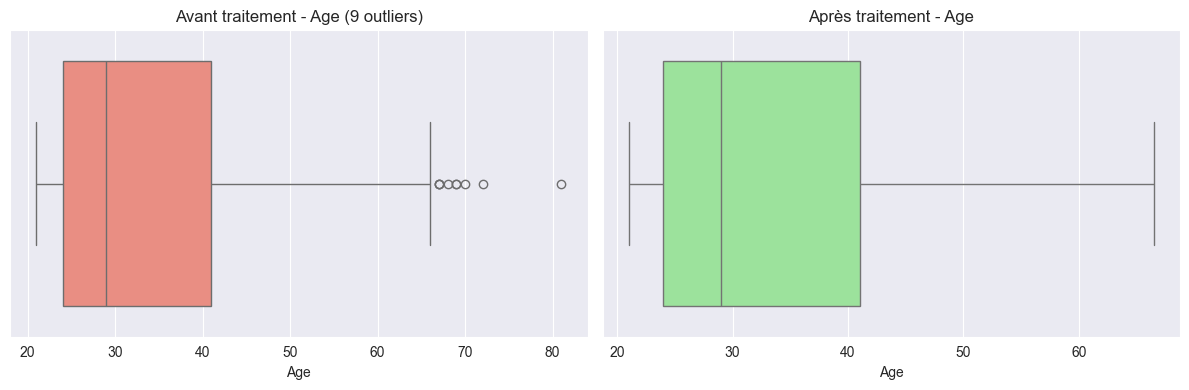

In [19]:
import pandas as pd
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt
# Copier le DataFrame après imputation

df_clean = df_imputed.copy()
# Colonnes numériques
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Détection des outliers avec IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound
# Gestion des outliers : Winsorize + Clipping IQR
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    n_outliers = len(outliers)

    if n_outliers > 0:
        df_clean[col] = winsorize(df_clean[col], limits=(0.01, 0.01)).data

    , lower, upper = detect_outliers_iqr(df_clean, col)
    df_clean[col] = df_clean[col].clip(lower, upper)
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(x=df_imputed[col], ax=axes[0], color='salmon')
    axes[0].set_title(f"Avant traitement - {col} ({n_outliers} outliers)")
    sns.boxplot(x=df_clean[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Après traitement - {col}")
    plt.tight_layout()
    plt.show()


In [20]:
correlation_matrix = df_cleaned.corr()


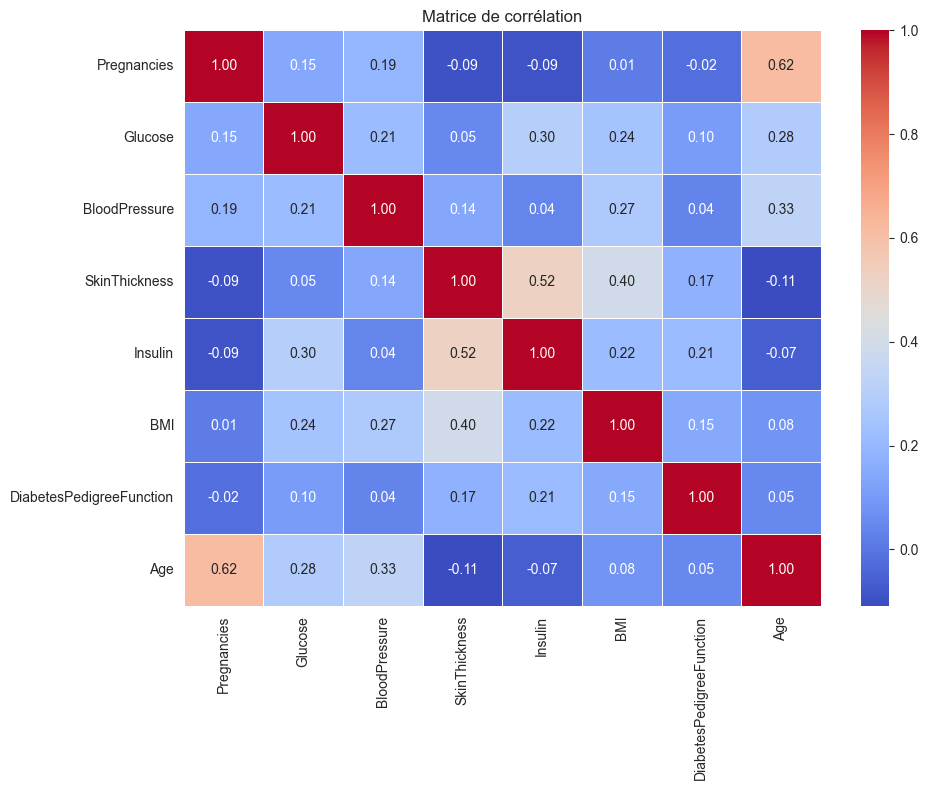

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

## Sélectionner variables à forte variabilité

In [22]:
df_cleaned.var()

Pregnancies                    8.762938
Glucose                      764.887626
BloodPressure                175.988222
SkinThickness                235.664592
Insulin                     7180.915963
BMI                           41.107483
DiabetesPedigreeFunction       0.065592
Age                           98.820669
dtype: float64

## Visualiser relations via pairplot

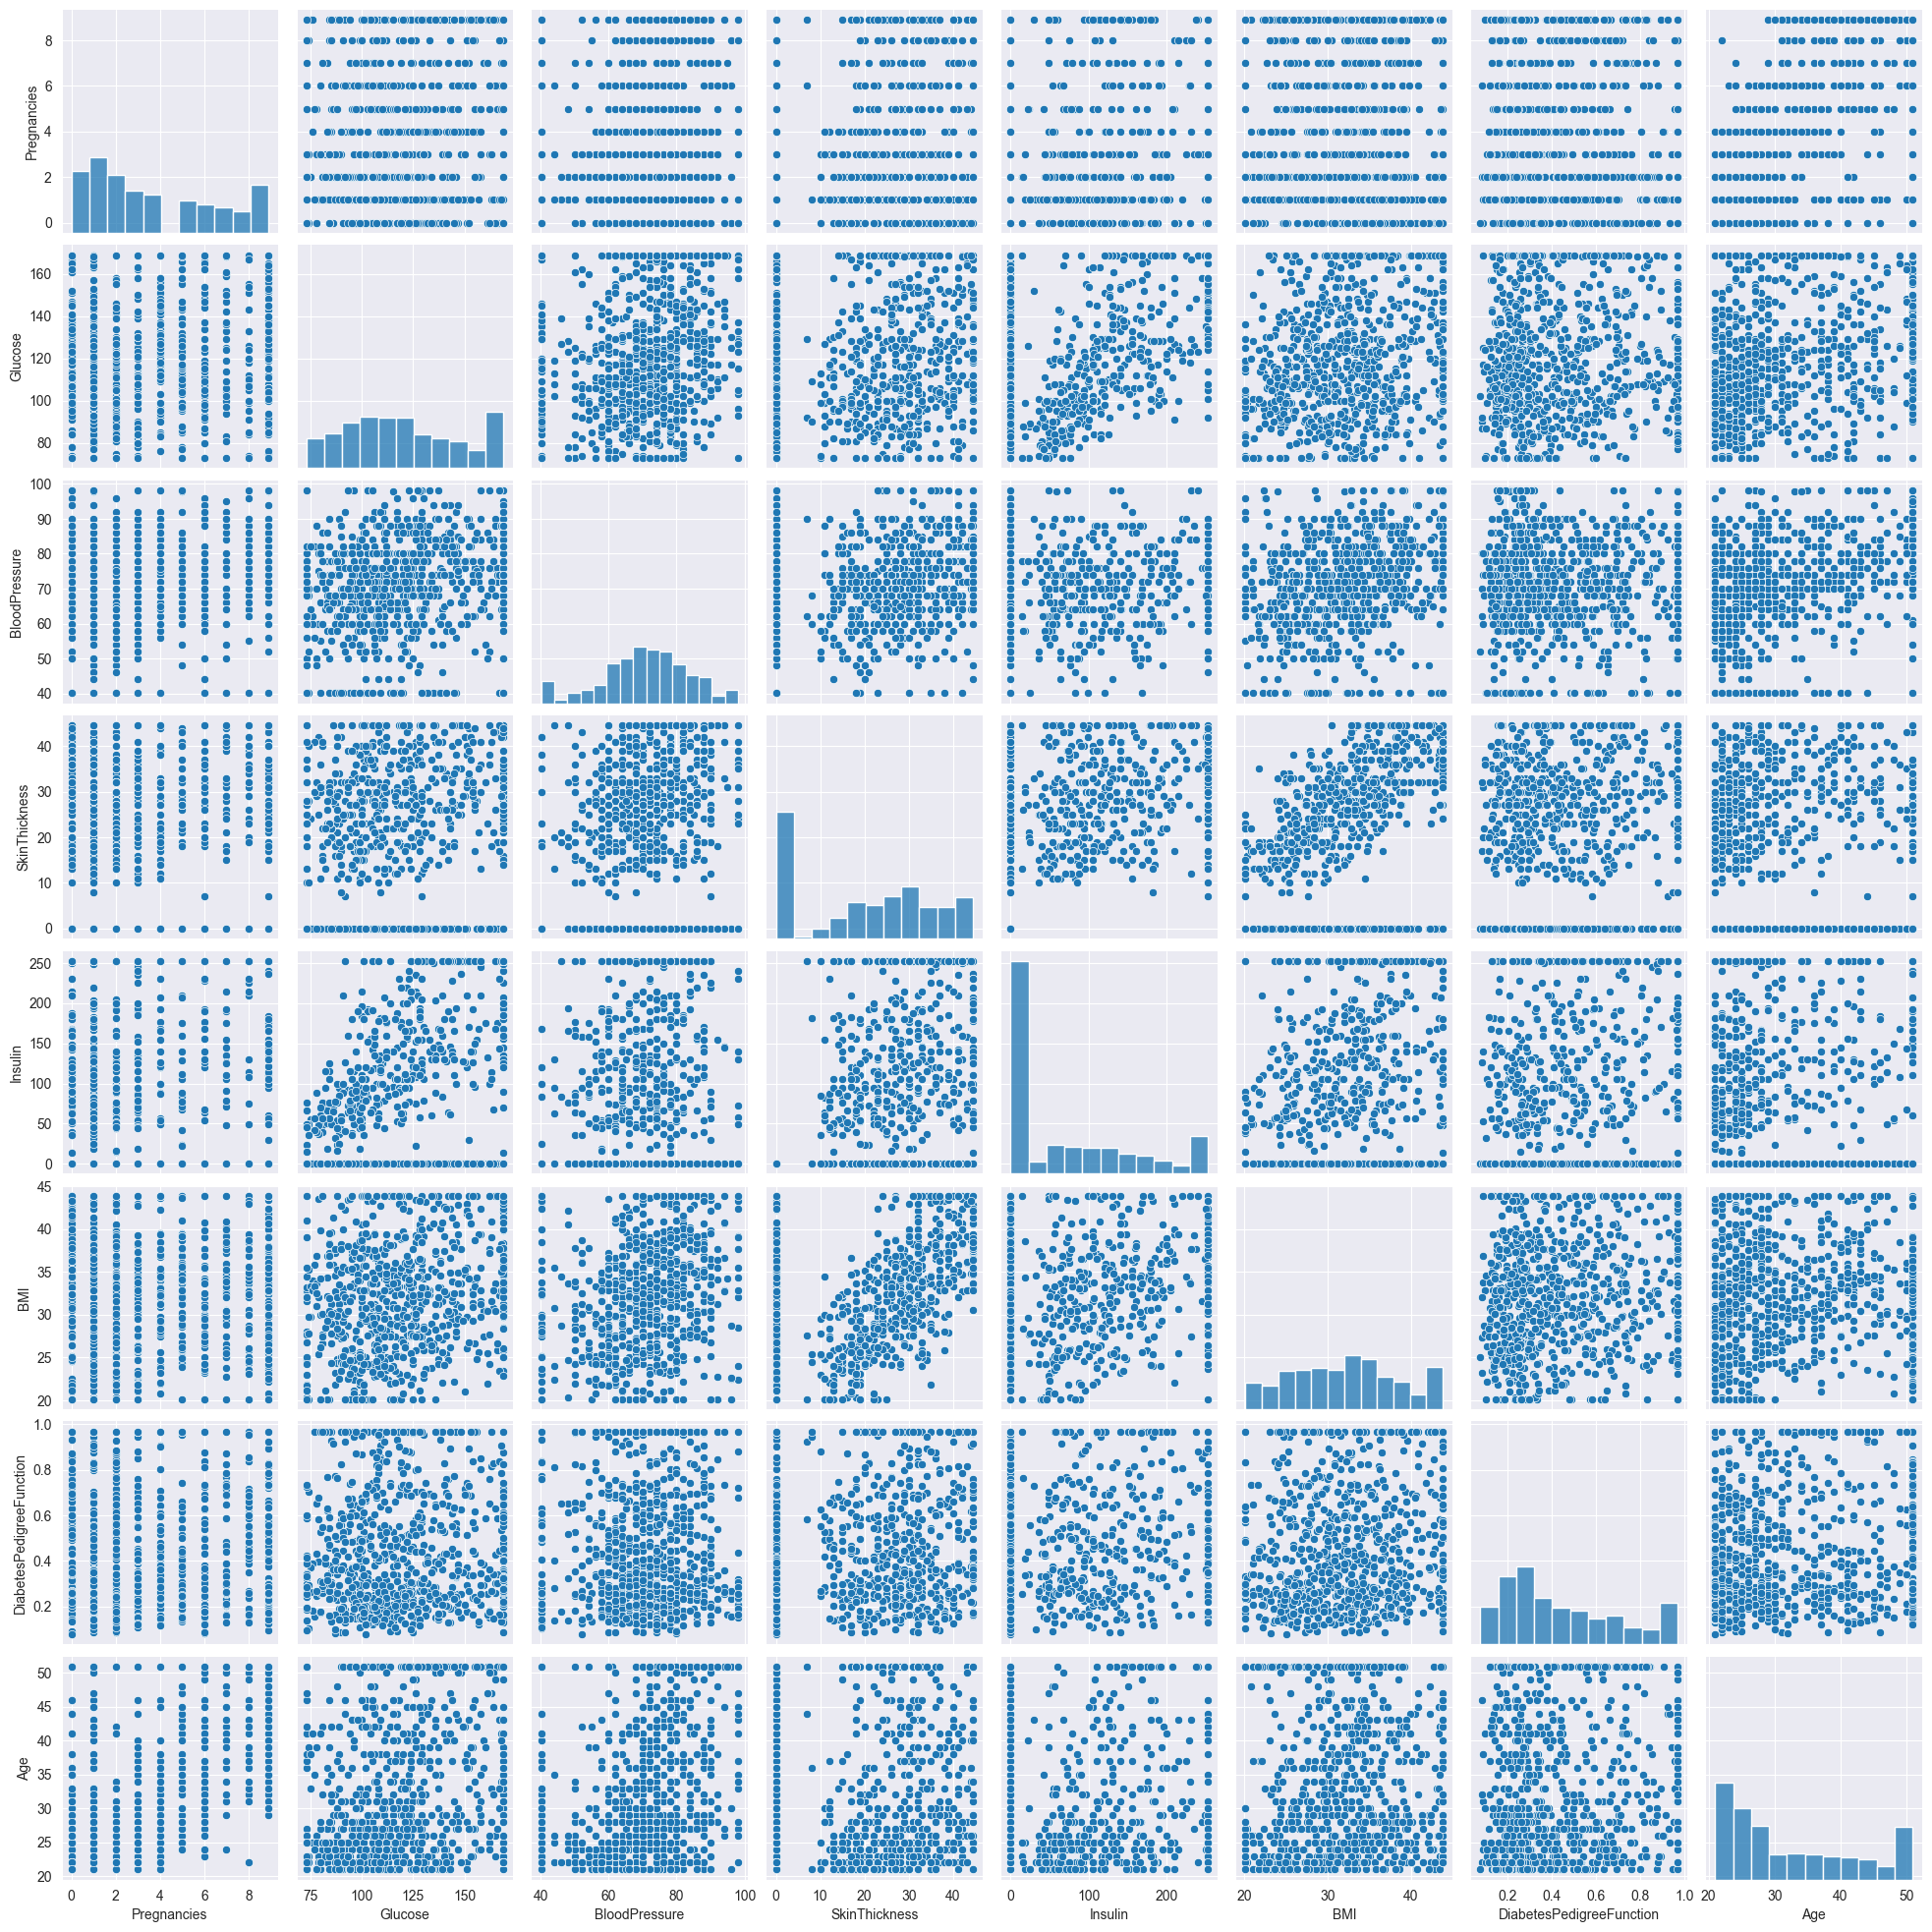

In [23]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df_cleaned)
plt.show()

## Appliquer StandardScaler ou MinMaxScaler

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)




## Appliquer méthode du coude (Elbow)

Taille du dataset: 768 observations, 8 variables
Plage k optimisée: 2 à 10


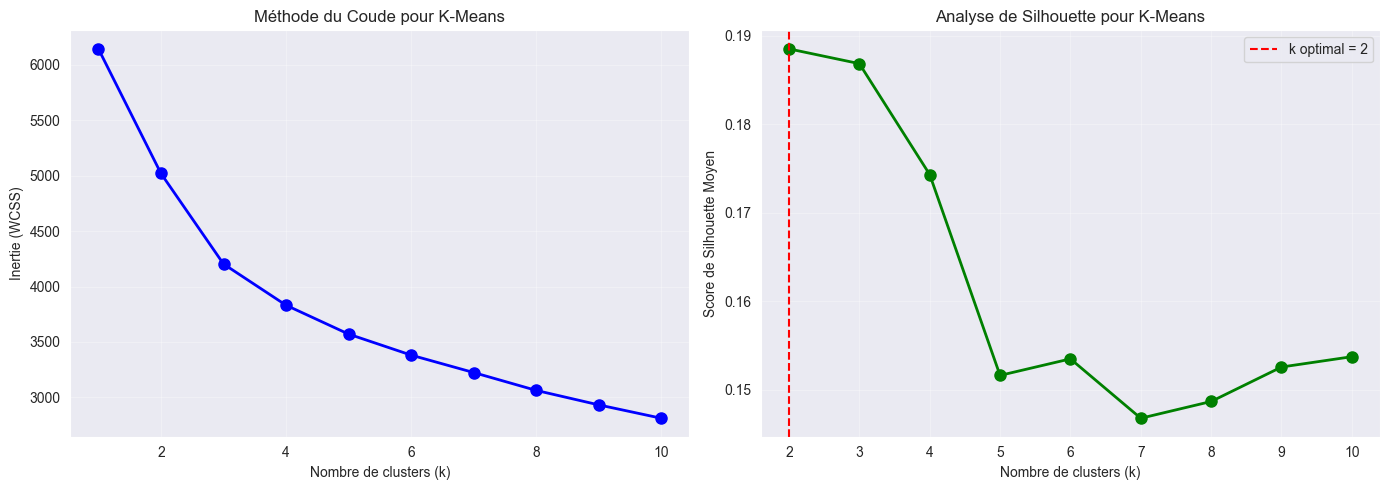


📊 Résultats de l'analyse:
k optimal (silhouette): 2
Score de silhouette max: 0.189


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
df_scaled = pd.DataFrame(data = scaled_data , columns=df.columns)

n_samples = len(scaled_data)
n_features = scaled_data.shape[1]

if n_samples < 100:
    k_max = min(8, n_samples // 5)
elif n_samples > 1000:
    k_max = 15
else:
    k_max = 10

print(f"Taille du dataset: {n_samples} observations, {n_features} variables")
print(f"Plage k optimisée: 2 à {k_max}")

k_range_inertia = range(1, k_max + 1)
k_range_silhouette = range(2, k_max + 1)
inertia = []
silhouette_scores = []

for k in k_range_inertia:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range_inertia, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (WCSS)')
plt.title('Méthode du Coude pour K-Means')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range_silhouette, silhouette_scores, 'go-', markersize=8, linewidth=2)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette Moyen')
plt.title('Analyse de Silhouette pour K-Means')
plt.grid(True, alpha=0.3)

optimal_k = k_range_silhouette[np.argmax(silhouette_scores)]
plt.axvline(x=optimal_k, color='red', linestyle='--',
            label=f'k optimal = {optimal_k}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 Résultats de l'analyse:")
print(f"k optimal (silhouette): {optimal_k}")
print(f"Score de silhouette max: {max(silhouette_scores):.3f}")

In [26]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

print("Nombre de clusters choisi (k) :", 2)
print("\nÉtiquettes des 10 premiers points de données :\n", cluster_labels[:10])

Nombre de clusters choisi (k) : 2

Étiquettes des 10 premiers points de données :
 [1 0 1 0 0 1 0 1 1 1]


In [27]:
df_scaled['cluster'] = cluster_labels
df_scaled


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,0.792549,1.006052,0.090545,0.960672,-0.825596,0.240457,0.706905,1.768586,1
1,-0.897612,-1.273369,-0.362032,0.569573,-0.825596,-0.852041,-0.371462,-0.143963,0
2,1.468613,1.760557,-0.512891,-1.320741,-0.825596,-1.367076,0.882725,-0.043302,1
3,-0.897612,-1.128644,-0.362032,0.178473,0.284398,-0.617934,-1.090373,-1.150568,0
4,-1.235644,0.608058,-2.317786,0.960672,1.158224,1.723132,2.042630,0.057358,0
...,...,...,...,...,...,...,...,...,...
763,1.772646,-0.694469,0.392263,1.577617,1.299925,0.131207,-1.074745,1.857292,1
764,-0.559580,0.065338,-0.060314,0.439206,-0.825596,0.739884,-0.414441,-0.546605,0
765,0.454517,0.029157,0.090545,0.178473,0.496950,-0.914469,-0.785618,-0.244623,0
766,-0.897612,0.210064,-0.814609,-1.320741,-0.825596,-0.305792,-0.379276,1.466605,1


C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_scaled, palette='viridis')


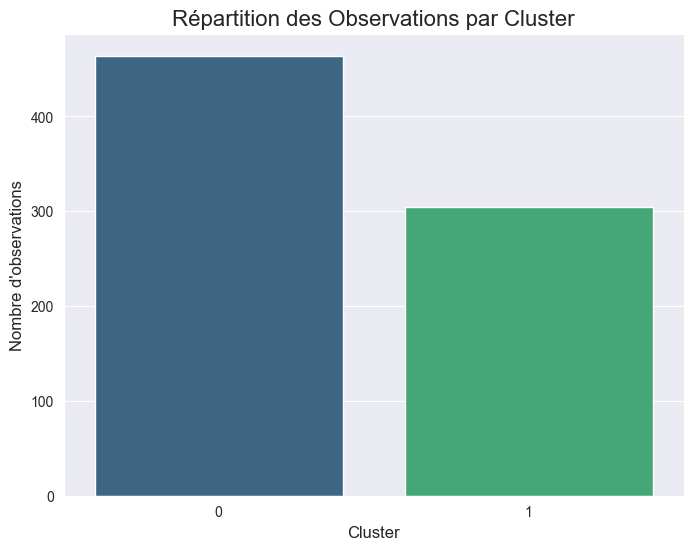

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


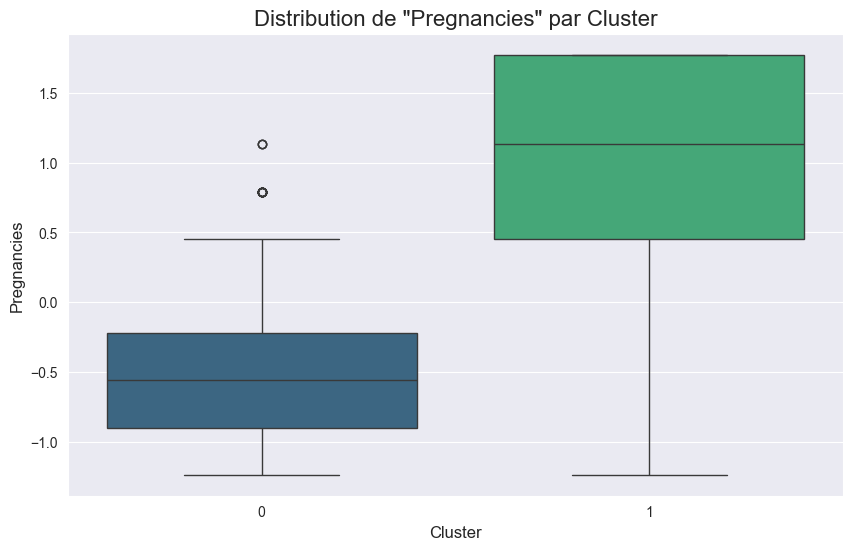

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


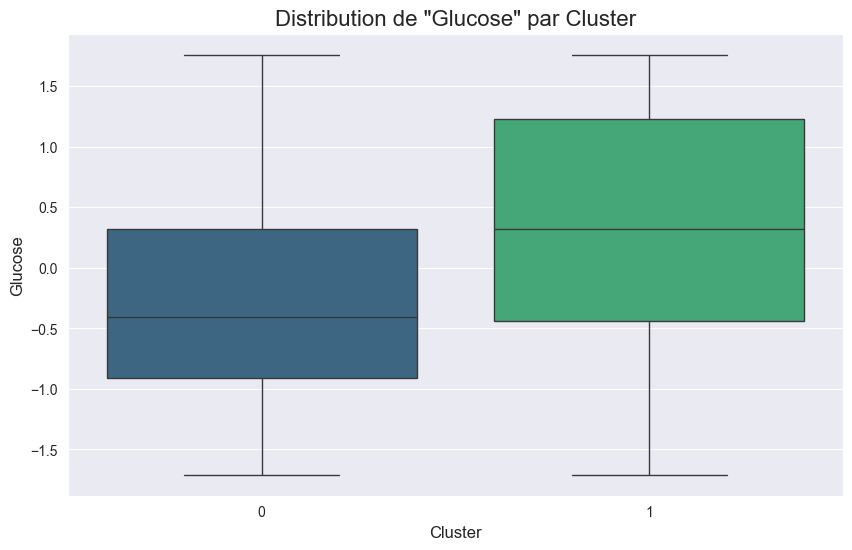

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


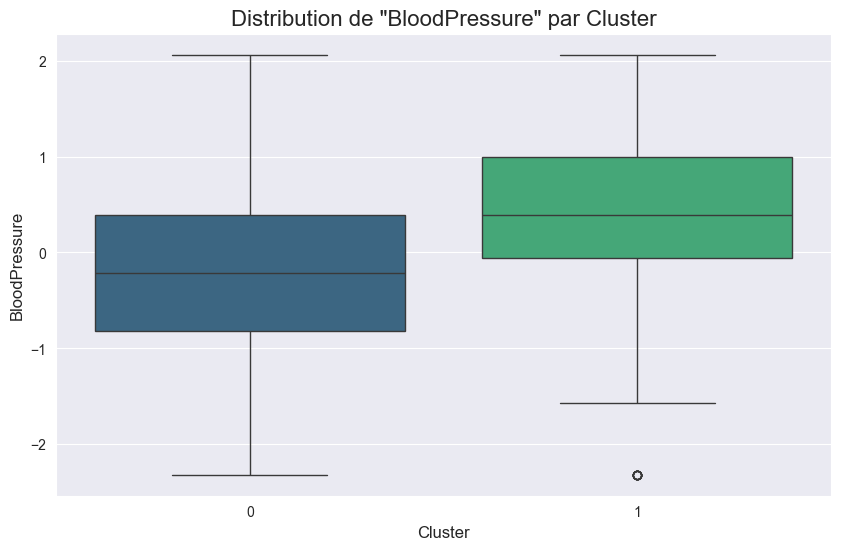

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


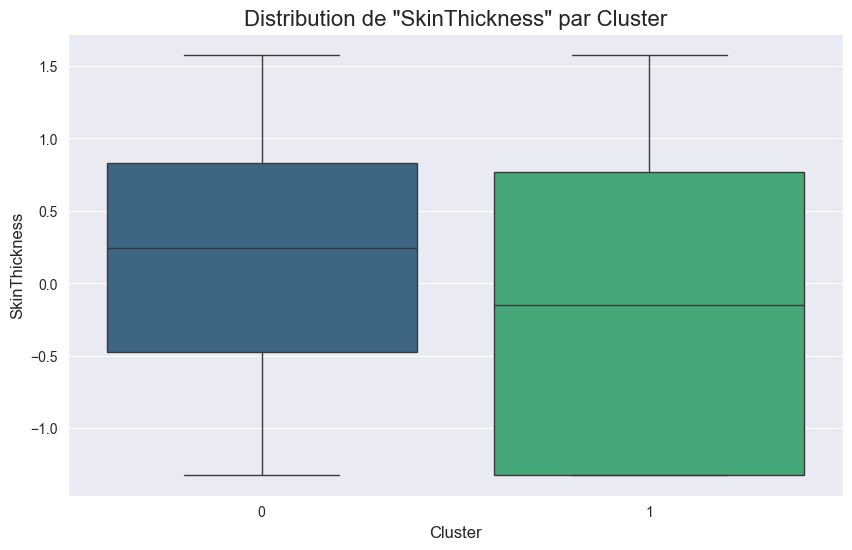

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


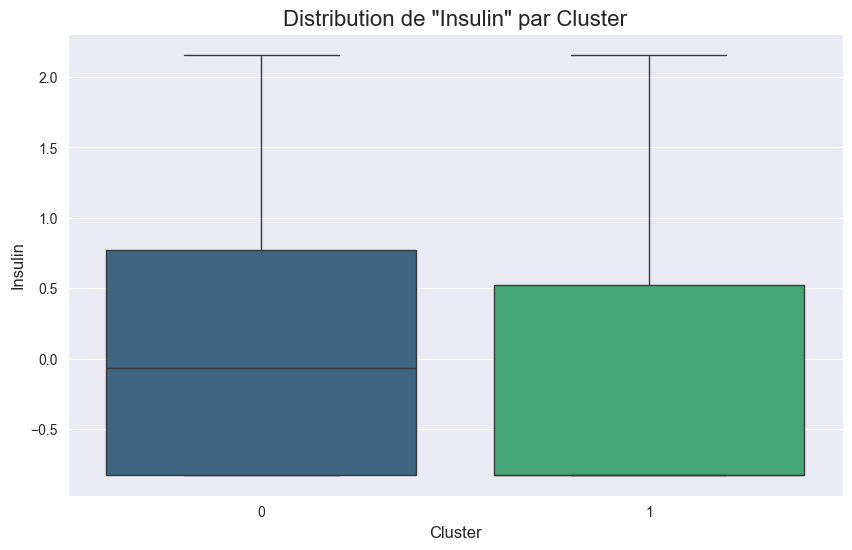

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


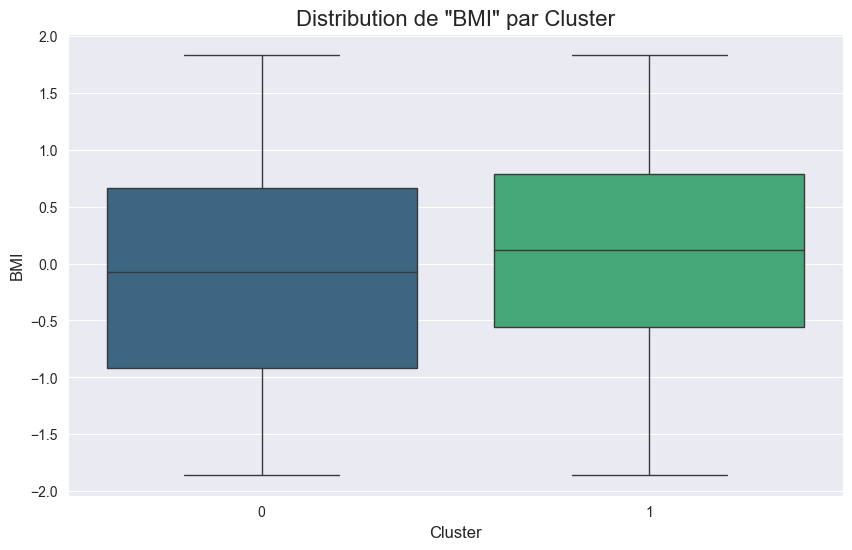

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


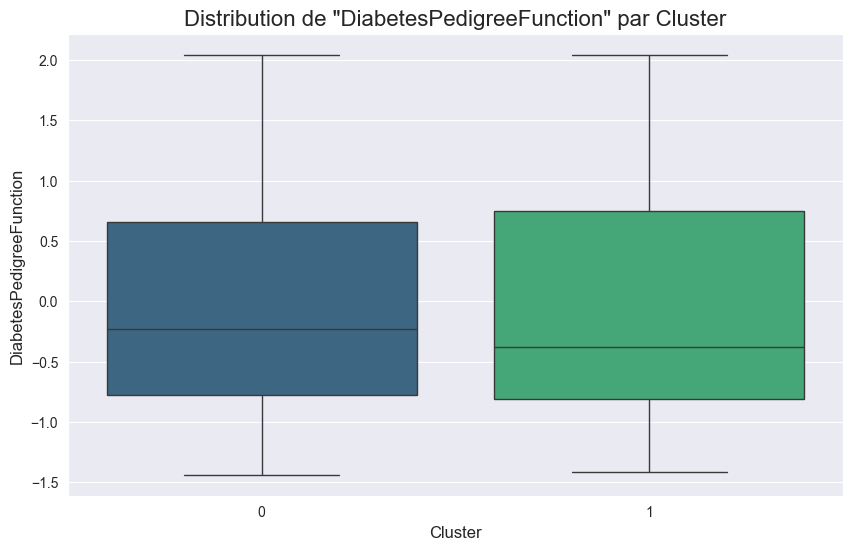

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


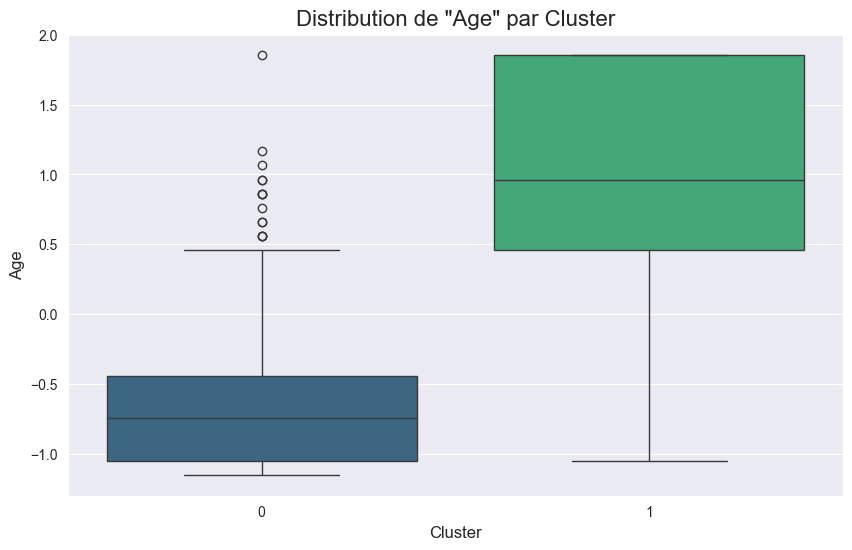

C:\Users\boume\AppData\Local\Temp\ipykernel_43152\2344575660.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')


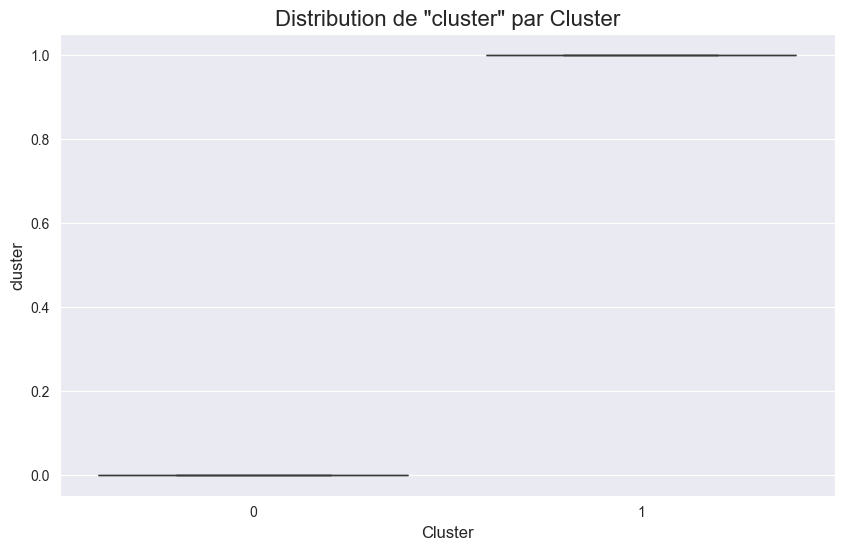

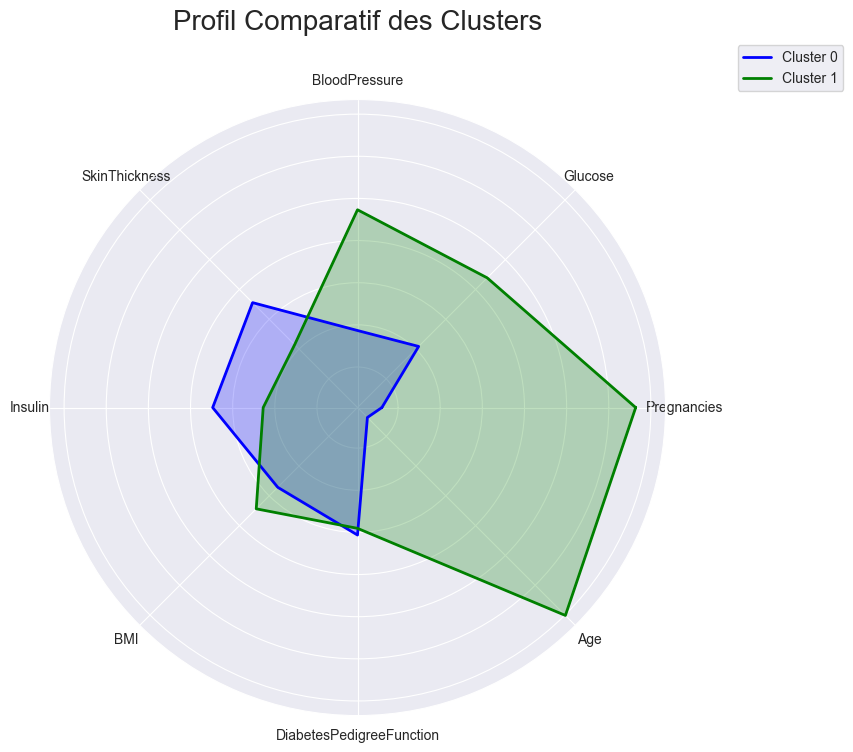

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supposons que 'df_clustered' est votre DataFrame avec la colonne 'cluster'
# Supposons que 'scaled_data' est votre jeu de données normalisé
# Supposons que 'final_kmeans_model' est votre modèle entraîné

# --- 1.1. Visualisation de la taille des clusters ---
# Un simple graphique à barres pour voir combien d'observations sont dans chaque cluster.

plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df_scaled, palette='viridis')
plt.title('Répartition des Observations par Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Nombre d\'observations', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# --- 1.2. Comparaison des caractéristiques par cluster (Box Plots) ---
# C'est la visualisation la plus importante pour l'interprétation.
# Elle nous montre la distribution de chaque variable pour chaque cluster.

# Pour chaque caractéristique (colonne) de votre DataFrame original
for column in df_scaled.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=column, data=df_scaled, palette='viridis')
    plt.title(f'Distribution de "{column}" par Cluster', fontsize=16)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()

# --- 1.3. Profil des Clusters (Radar Chart) ---
# Une excellente façon de visualiser le "profil" de chaque cluster en comparant
# les valeurs moyennes de leurs caractéristiques.

# Calculer les centroïdes sur les données normalisées pour une comparaison équitable
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

# Préparation pour le graphique radar
labels = centroids_df.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Répéter le premier angle pour fermer le cercle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Fonction pour ajouter chaque cluster au graphique
def add_to_radar(cluster_profile, color, label):
    values = cluster_profile.tolist()
    values += values[:1] # Répéter la première valeur pour fermer le cercle
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=label)
    ax.fill(angles, values, color=color, alpha=0.25)

# Ajouter les profils des clusters
add_to_radar(centroids_df.iloc[0], 'blue', 'Cluster 0')
add_to_radar(centroids_df.iloc[1], 'green', 'Cluster 1')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Profil Comparatif des Clusters', size=20, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

Calculer les moyennes des caractéristiques au sein de chaque cluster.


In [36]:
cluster_means = df_scaled.groupby('cluster').mean()
print("Tableau des caractéristiques moyennes par cluster :")
df_scaled

Tableau des caractéristiques moyennes par cluster :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,0.792549,1.006052,0.090545,0.960672,-0.825596,0.240457,0.706905,1.768586,1
1,-0.897612,-1.273369,-0.362032,0.569573,-0.825596,-0.852041,-0.371462,-0.143963,0
2,1.468613,1.760557,-0.512891,-1.320741,-0.825596,-1.367076,0.882725,-0.043302,1
3,-0.897612,-1.128644,-0.362032,0.178473,0.284398,-0.617934,-1.090373,-1.150568,0
4,-1.235644,0.608058,-2.317786,0.960672,1.158224,1.723132,2.042630,0.057358,0
...,...,...,...,...,...,...,...,...,...
763,1.772646,-0.694469,0.392263,1.577617,1.299925,0.131207,-1.074745,1.857292,1
764,-0.559580,0.065338,-0.060314,0.439206,-0.825596,0.739884,-0.414441,-0.546605,0
765,0.454517,0.029157,0.090545,0.178473,0.496950,-0.914469,-0.785618,-0.244623,0
766,-0.897612,0.210064,-0.814609,-1.320741,-0.825596,-0.305792,-0.379276,1.466605,1


Compter le nombre d’observations par groupe.


In [33]:
cluster_nbr_obs = df_scaled.groupby('cluster').count()
print("Tableau des caractéristiques moyennes par cluster :")
print(cluster_nbr_obs)

Tableau des caractéristiques moyennes par cluster :
         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
cluster                                                                     
0                464      464            464            464      464  464   
1                304      304            304            304      304  304   

         DiabetesPedigreeFunction  Age  
cluster                                 
0                             464  464  
1                             304  304  


Identifier cluster à haut risque

In [ ]:
cluster_risque = [df_scaled["Glucose"] > 126 & df_scaled["BMI "] > 71]

In [43]:
scaled_centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(scaled_centroids)
original_cluster_means = pd.DataFrame(data=original_centroids, columns=df.columns)

print("Tableau des caractéristiques moyennes par cluster (VALEURS ORIGINALES) :")
print(original_cluster_means)

for i, cluster in original_cluster_means.iterrows():
    print(f"Cluster {i}:")

    glucose_mean = cluster['Glucose']
    bmi_mean = cluster['BMI']
    dpf_mean = cluster['DiabetesPedigreeFunction']

    if glucose_mean > 126 and bmi_mean > 32 and dpf_mean > 0.4:
        print(f"  -> INTERPRÉTATION : HAUT RISQUE")
        print(f"     - Glucose moyen: {glucose_mean:.2f} (> 126)")
        print(f"     - BMI moyen: {bmi_mean:.2f} (> 30)")
        print(f"     - DiabetesPedigreeFunction moyen: {dpf_mean:.2f} (> 0.5)")
    else:
        print(f"  -> INTERPRÉTATION : Risque plus faible / Standard")
        print(f"     - Glucose moyen: {glucose_mean:.2f}")
        print(f"     - BMI moyen: {bmi_mean:.2f}")
        print(f"     - DiabetesPedigreeFunction moyen: {dpf_mean:.2f}")
    print("-" * 30)

Tableau des caractéristiques moyennes par cluster (VALEURS ORIGINALES) :
   Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0     1.892241  113.900498      67.040631      22.404201  79.959681   
1     6.346546  129.800216      76.536988      16.992263  54.585445   

         BMI  DiabetesPedigreeFunction        Age  
0  31.601462                  0.450092  25.898451  
1  32.758139                  0.439938  42.399667  
Cluster 0:
  -> INTERPRÉTATION : Risque plus faible / Standard
     - Glucose moyen: 113.90
     - BMI moyen: 31.60
     - DiabetesPedigreeFunction moyen: 0.45
------------------------------
Cluster 1:
  -> INTERPRÉTATION : HAUT RISQUE
     - Glucose moyen: 129.80 (> 126)
     - BMI moyen: 32.76 (> 30)
     - DiabetesPedigreeFunction moyen: 0.44 (> 0.5)
------------------------------


Ajouter une colonne risk_category basée sur le numero de cluster (ex. : si 1 => risque élevé et 0 => faible).

In [45]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
0,0.792549,1.006052,0.090545,0.960672,-0.825596,0.240457,0.706905,1.768586,1
1,-0.897612,-1.273369,-0.362032,0.569573,-0.825596,-0.852041,-0.371462,-0.143963,0
2,1.468613,1.760557,-0.512891,-1.320741,-0.825596,-1.367076,0.882725,-0.043302,1
3,-0.897612,-1.128644,-0.362032,0.178473,0.284398,-0.617934,-1.090373,-1.150568,0
4,-1.235644,0.608058,-2.317786,0.960672,1.158224,1.723132,2.042630,0.057358,0
...,...,...,...,...,...,...,...,...,...
763,1.772646,-0.694469,0.392263,1.577617,1.299925,0.131207,-1.074745,1.857292,1
764,-0.559580,0.065338,-0.060314,0.439206,-0.825596,0.739884,-0.414441,-0.546605,0
765,0.454517,0.029157,0.090545,0.178473,0.496950,-0.914469,-0.785618,-0.244623,0
766,-0.897612,0.210064,-0.814609,-1.320741,-0.825596,-0.305792,-0.379276,1.466605,1


In [47]:
risk = {0:0 , 1:1}
df_scaled['risk_category'] = df_scaled['cluster'].map(risk)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster,risk_category
0,0.792549,1.006052,0.090545,0.960672,-0.825596,0.240457,0.706905,1.768586,1,1
1,-0.897612,-1.273369,-0.362032,0.569573,-0.825596,-0.852041,-0.371462,-0.143963,0,0
2,1.468613,1.760557,-0.512891,-1.320741,-0.825596,-1.367076,0.882725,-0.043302,1,1
3,-0.897612,-1.128644,-0.362032,0.178473,0.284398,-0.617934,-1.090373,-1.150568,0,0
4,-1.235644,0.608058,-2.317786,0.960672,1.158224,1.723132,2.042630,0.057358,0,0
...,...,...,...,...,...,...,...,...,...,...
763,1.772646,-0.694469,0.392263,1.577617,1.299925,0.131207,-1.074745,1.857292,1,1
764,-0.559580,0.065338,-0.060314,0.439206,-0.825596,0.739884,-0.414441,-0.546605,0,0
765,0.454517,0.029157,0.090545,0.178473,0.496950,-0.914469,-0.785618,-0.244623,0,0
766,-0.897612,0.210064,-0.814609,-1.320741,-0.825596,-0.305792,-0.379276,1.466605,1,1


Définir y à partir de la colonne Cluster

In [50]:

y =  df_scaled["cluster"]

Définir X avec variables sélectionnées

In [52]:
X = df_scaled.drop(columns=["cluster","risk_category"])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.792549,1.006052,0.090545,0.960672,-0.825596,0.240457,0.706905,1.768586
1,-0.897612,-1.273369,-0.362032,0.569573,-0.825596,-0.852041,-0.371462,-0.143963
2,1.468613,1.760557,-0.512891,-1.320741,-0.825596,-1.367076,0.882725,-0.043302
3,-0.897612,-1.128644,-0.362032,0.178473,0.284398,-0.617934,-1.090373,-1.150568
4,-1.235644,0.608058,-2.317786,0.960672,1.158224,1.723132,2.042630,0.057358
...,...,...,...,...,...,...,...,...
763,1.772646,-0.694469,0.392263,1.577617,1.299925,0.131207,-1.074745,1.857292
764,-0.559580,0.065338,-0.060314,0.439206,-0.825596,0.739884,-0.414441,-0.546605
765,0.454517,0.029157,0.090545,0.178473,0.496950,-0.914469,-0.785618,-0.244623
766,-0.897612,0.210064,-0.814609,-1.320741,-0.825596,-0.305792,-0.379276,1.466605


Diviser données avec train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,    y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=104, shuffle=True)

Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage ou sous-échantillonnage (RandomOverSampler, UnderSampler via imblearn).

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print(pd.Series(y_res).value_counts())

cluster
1    464
0    464
Name: count, dtype: int64
